# Exercises

In [1]:
# Useful import for next Exs
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Define Dataset for some next exercises
digits = datasets.load_digits()

# Split data into 80% train+validation and 20% test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

# Split the train+validation into 80% train and 20% validation subsets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False
)

## Exercise 1: Error Analysis

Analyse models' outcomes: *error analysis* is an example of something you should do after training your models. 
Question: "why is my model mispredicting some samples?" 

Using the dataset (and split) adopted during the theoretical part of the lab, select the best hyperparameters for an SVC among the followings: 

    - kernel = 'rbf'
    - C = [0.1, 1, 10]

Finally, compute the accuracy on the test set of the selected model. 

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

svc_grid_params = {'C': (0.1, 1., 10)}
svc_clf = SVC(kernel = 'rbf') 
svc_v2 = GridSearchCV(svc_clf, svc_grid_params, n_jobs= -1, cv = 5)
svc_v2.fit(X_train_val, y_train_val)

y_test_pred = svc_v2.predict(X_test)
print(accuracy_score(y_test_pred, y_test))

0.9583333333333334


Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html"> [link] </a> to create a ConfusionMatrix from the best model you find above over the *test set*.


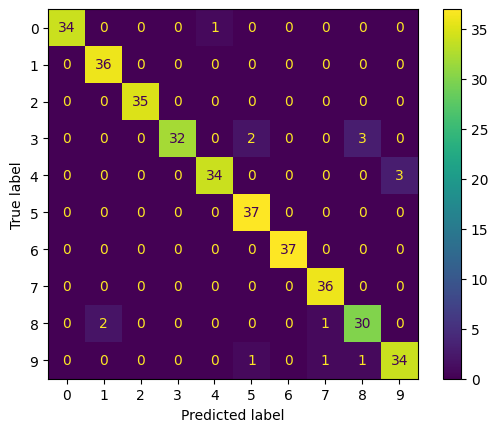

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, labels=svc_v2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_v2.classes_)
disp.plot()
plt.show()

The diagonals contains high values: expected, as it means that most of the predictions are correct. 
Another interesting patterns can be found among the mispredictions. There are three examples of class 4 which are predicted as class 9. Let's see how they look like.

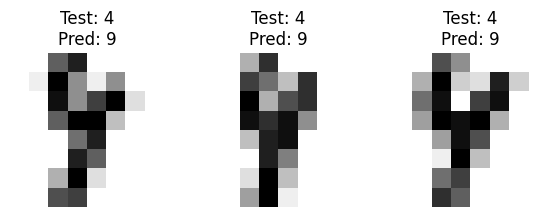

In [4]:
indices = np.all([ (y_test==4), (y_test_pred==9) ], axis=0) # find the index of the examples of class 4 predicted as class 9
                                                            # np.all returns the elements of the input vector that satisfy all conditions 
_, axes = plt.subplots(nrows=1, ncols=sum(indices==True), figsize=(7,2))
for ax, image, label, pred_label in zip(axes, X_test[indices], y_test[indices], y_test_pred[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Test: %i\nPred: %i" % (label, pred_label))


I could argue that those seem actually 9s instead of 4s, in other words the labels could be noisy. Therefore, I might decide not to spend time improving the performance of the algorithm. These examples could be used when discussing the performance of our learning system with the clients, to say that those are mistakes that even some humans would do (of course we need to check that the same happens for other mistakes). 
In summary, sometimes it is ok to have classifiers that do mistakes if these mistakes "make sense" somehow. 


## Exercise 2: Visualising the Use of Different kernels

Recall that the SVM corresponds to a linear discriminant function in the feature space $\phi$. But how does the discriminat function look back in the input space? In this exercise, we see how does it change for different kernels and parameters.

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

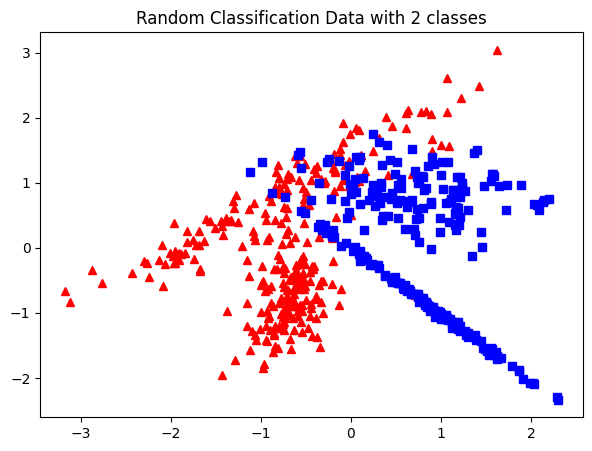

In [5]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_classification(n_samples=700, n_features=2, random_state=124, n_redundant= 0, n_informative=2, scale=10, shift=10)

# split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
# only into train and test set, for this exercise we avoid the val

# scale 
scl = StandardScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

# visualize the data
fig = plt.figure(figsize=(7,5))
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r^')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')
plt.title('Random Classification Data with 2 classes')


We now create the function that - given a trained model, some data samples $X$ and the ground truth $y$ - plots the model decision boundary. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def plot_discriminat_function(X,y, trained_model):
    ## Plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # h = (x_max / x_min)/100
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # X_plot = np.c_[xx.ravel(), yy.ravel()]
    x_span = np.linspace(x_min, x_max, 100)
    y_span = np.linspace(y_min, y_max, 100)
    xx, yy = np.meshgrid(x_span, y_span)
    X_plot = np.c_[xx.ravel(), yy.ravel()]

    predicted = trained_model.predict(X_plot)
    predicted = predicted.reshape(xx.shape)

    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.contourf(xx, yy, predicted, alpha=0.5)
    plt.set_cmap("gist_rainbow") 
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
    
    plt.xlim(xx.min(), xx.max())
    plt.title(trained_model)
    plt.show()


### Exercise 2.1 

Train an SVM with:


*   kernel = polynomial
*   degree = 2
*   coef0 = 1

Feed the trained model into *plot_discriminat_function* and visually analyze the obtained decision boundary.



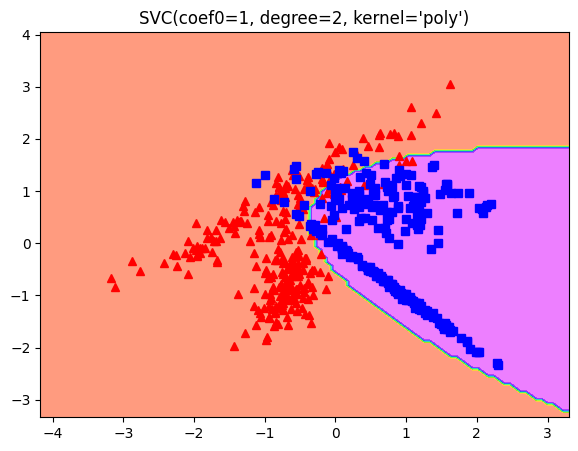

In [7]:
svclassifier = SVC(kernel="poly", degree=2, coef0=1)
svclassifier.fit(X_train, y_train)
plot_discriminat_function(X_train, y_train, svclassifier)


### Exercise 2.2

Let's define now a function that, given a trained model, computes training and testing accuracy.

Then, use this function over the model trained in Exercise 2.1.

In [8]:
def compute_accuracy(trained_model, X_train, y_train, X_test, y_test):
    print("Accuracy on Train:", accuracy_score(y_train, trained_model.predict(X_train)))
    print("Accuracy on Test:", accuracy_score(y_test, trained_model.predict(X_test)))

compute_accuracy(svclassifier, X_train, y_train, X_test, y_test)

Accuracy on Train: 0.9285714285714286
Accuracy on Test: 0.9285714285714286


### Exercise 2.3

Repeat the experiment with an SVC (linear kernel) and compare it with the polynomial one in terms of both accuracy (training and testing) and discriminant function (using the plotting function).


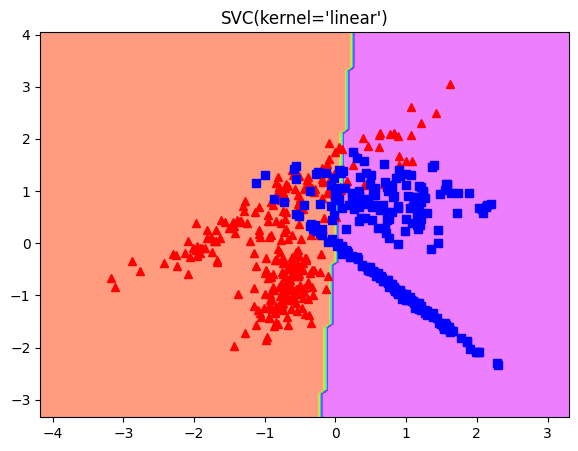

Accuracy on Train: 0.8875
Accuracy on Test: 0.8642857142857143


In [9]:
svclassifier = SVC(kernel="linear")
svclassifier.fit(X_train, y_train)
plot_discriminat_function(X_train, y_train, svclassifier)
compute_accuracy(svclassifier, X_train, y_train, X_test, y_test)

### Exercise 2.4

Repeat what done in Exercise 2.3. 
This time, use an RBF kernel at the varying of $\sigma$ = [0.001, 0.1, 10, 100, 500].

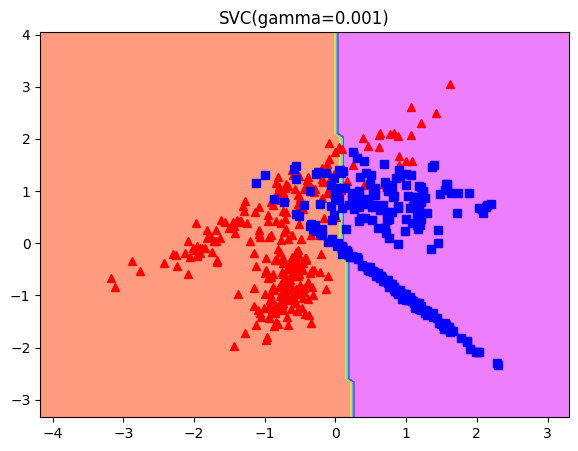

Accuracy on Train: 0.8732142857142857
Accuracy on Test: 0.8428571428571429



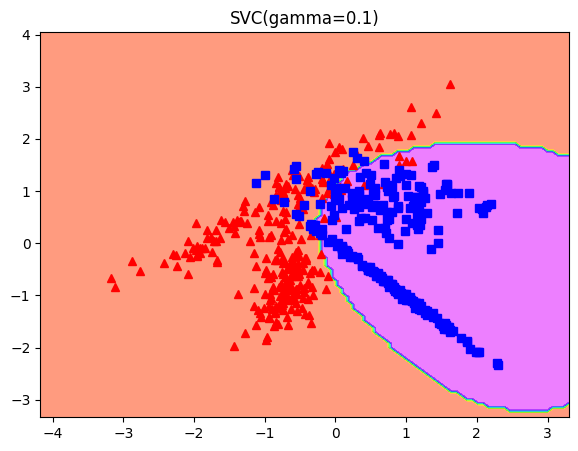

Accuracy on Train: 0.9214285714285714
Accuracy on Test: 0.9142857142857143



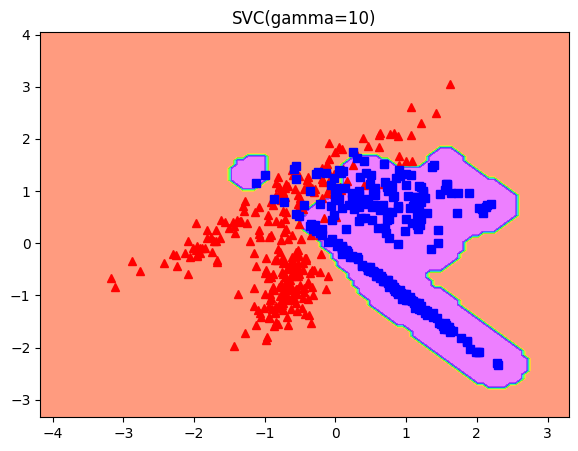

Accuracy on Train: 0.9428571428571428
Accuracy on Test: 0.9357142857142857



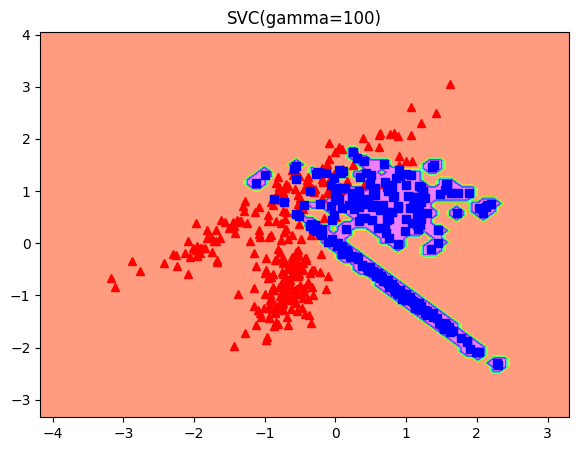

Accuracy on Train: 0.9678571428571429
Accuracy on Test: 0.8714285714285714



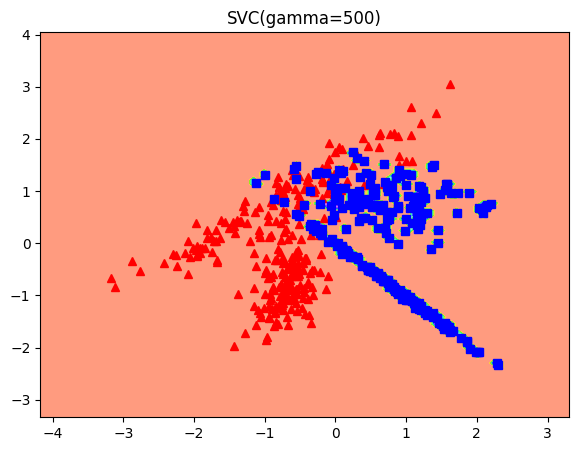

Accuracy on Train: 0.9910714285714286
Accuracy on Test: 0.7571428571428571



In [10]:
for sigma in [0.001, 0.1, 10, 100, 500]:
  svclassifier = SVC(kernel="rbf", gamma=sigma)
  svclassifier.fit(X_train, y_train)
  plot_discriminat_function(X_train, y_train, svclassifier)
  compute_accuracy(svclassifier, X_train, y_train, X_test, y_test)
  print()


Higher $\sigma$, the better the model over the training data. 

However, the accuracy on the test set improves until $\sigma=10$, and then it decreses. With high $\sigma$ values we overfit our data: the decision function tends to coincide with the training examples of the blue class (basically memorizing them). 

## Exercise 3: Comparing the Execution Times of Learning Algorithms

In this exercise, we are going to experiment with the computational cost, i.e. training and prediction time, of different learning algorithms. 

The exercise is conducted over the *MNIST* dataset. Since we are not optimising the hyperparameters of the learning algorithms (use the default values) we won't create the validation set. 

**ALERT: for this entire exercise, do not set any random_state**

In [11]:
from sklearn.preprocessing import StandardScaler

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

# scale the data 
scl = StandardScaler().fit(X_train)
X_train_scl = scl.transform(X_train)
X_test_scl = scl.transform(X_test)

num_classes = len(set(y_train))
num_features = X_train.shape[1]

print(f"train size={len(X_train_scl)}, test size={len(X_test_scl)}")
print(f"number of features = {num_features}; number of classes = {num_classes}")

train size=1437, test size=360
number of features = 64; number of classes = 10


### Exercise 3.1

Create a function that, given a learning algorithm implemented in Sklearn, keeps track of the average over 5 executions of: the time needed to do training, the time needed to make predictions, the accuracy on the training set and the accuracy on the test set.

In [12]:
from sklearn.linear_model import Perceptron

def test_algorithm(learning_alg, X_train, y_train, X_test, y_test):  
  # empty list to keep track of the running times and accuracy values of each repetition
  train_time_iter, pred_time_iter, train_accuracy_iter, test_accuracy_iter = [], [], [], [] 

  for _ in range(5):
    start_time = time.time() # get the starting time
    learning_alg.fit(X_train, y_train)
    end_time = time.time() # get the ending time
    train_time_iter.append(end_time - start_time)

    start_time = time.time() # get the starting time
    y_train_pred = learning_alg.predict(X_train)
    y_test_pred = learning_alg.predict(X_test)
    end_time = time.time() # get the ending time
    pred_time_iter.append(end_time - start_time)
    
    train_accuracy_iter.append(accuracy_score(y_train, y_train_pred))
    test_accuracy_iter.append(accuracy_score(y_test, y_test_pred))

  return np.mean(train_time_iter), np.mean(pred_time_iter), np.mean(train_accuracy_iter), np.mean(test_accuracy_iter)


### Exercise 3.2 

Now use the function test_algorithm() implemented in the previous exercise to collect statistics over the following algorithms: 

1. Perceptron
2. Logistic Regression
3. SVM with linear kernel
4. SVM with polynomial kernel of degree 2
5. SVM with polynomial kernel of degree 3
6. Decision Tree using Entropy for splitting
7. K-NN with K=3

The statistics must be collected in:

1.   tr_time_list = list containing the training time of a specific model.
2.   pr_time_list = list containing the prediction time of a specific model. 
3.   tr_acc_list = list containing the training accuracy of a specific model.
4.   te_acc_list = list containing the accuracy on the test set of a specific model.
5.   model_name_list = list containing the model name.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

#initialize the lists collecting the stats
tr_time_list, pr_time_list, tr_acc_list, te_acc_list, model_name_list = [], [], [], [], []

model_name_list.append("Perceptron")
train_time, pred_time, train_accuracy, test_accuracy = test_algorithm(Perceptron(), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
pr_time_list.append(pred_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("Logistic Regression")
train_time, pred_time, train_accuracy, test_accuracy = test_algorithm(LogisticRegression(), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
pr_time_list.append(pred_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Linear Kernel")
train_time, pred_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="linear"), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
pr_time_list.append(pred_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Polynomial Kernel d=2")
train_time, pred_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="poly", degree=2), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
pr_time_list.append(pred_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Polynomial Kernel d=3")
train_time, pred_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="poly", degree=3), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
pr_time_list.append(pred_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("Decision Tree")
train_time, pred_time, train_accuracy, test_accuracy = test_algorithm(tree.DecisionTreeClassifier(criterion='entropy'), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
pr_time_list.append(pred_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("3-NN")
train_time, pred_time, train_accuracy, test_accuracy = test_algorithm(KNeighborsClassifier(n_neighbors=3), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
pr_time_list.append(pred_time); 
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

for i in range(len(tr_time_list)):
  print(f"{model_name_list[i]}\n   Training time: {tr_time_list[i]}\n   Prediction time: {pr_time_list[i]}")
  print(f"   Accuracy on train: {tr_acc_list[i]}\n   Accuracy on test {te_acc_list[i]}")

Perceptron
   Training time: 0.029453086853027343
   Prediction time: 0.001025247573852539
   Accuracy on train: 0.9832985386221293
   Accuracy on test 0.8916666666666668
Logistic Regression
   Training time: 0.04696888923645019
   Prediction time: 0.0008038043975830078
   Accuracy on train: 1.0
   Accuracy on test 0.8972222222222224
SVM Linear Kernel
   Training time: 0.018809795379638672
   Prediction time: 0.01856374740600586
   Accuracy on train: 1.0
   Accuracy on test 0.9277777777777778
SVM Polynomial Kernel d=2
   Training time: 0.03924403190612793
   Prediction time: 0.03746519088745117
   Accuracy on train: 0.9958246346555324
   Accuracy on test 0.9416666666666667
SVM Polynomial Kernel d=3
   Training time: 0.04513673782348633
   Prediction time: 0.0381624698638916
   Accuracy on train: 0.9846903270702854
   Accuracy on test 0.9027777777777779
Decision Tree
   Training time: 0.014268970489501953
   Prediction time: 0.0008002758026123047
   Accuracy on train: 1.0
   Accuracy on

### Visualising the Results



Remember that here, each of the five lists must contain 7 values.

In [14]:
# this cell checks if you have the right amount of info 
expected_list_length = 7
assert len(tr_acc_list) == expected_list_length
assert len(te_acc_list) == expected_list_length
assert len(tr_time_list) == expected_list_length
assert len(pr_time_list) == expected_list_length
assert len(model_name_list) == expected_list_length

Text(0, 0.5, 'Training Time [s]')

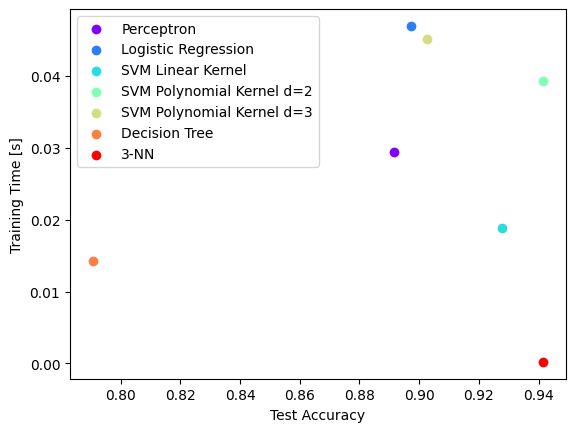

In [15]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(model_name_list)))
for x, y, c, m in zip(te_acc_list, tr_time_list, colors, model_name_list):
    plt.scatter(x, y, color = c, label = m)
plt.legend()
plt.xlabel("Test Accuracy")
plt.ylabel("Training Time [s]")

Text(0, 0.5, 'Prediction Time [s]')

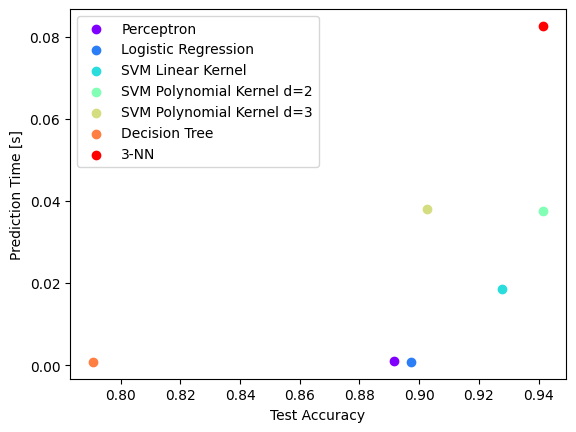

In [16]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(model_name_list)))
for x, y, c, m in zip(te_acc_list, pr_time_list, colors, model_name_list):
    plt.scatter(x, y, color = c, label = m)
plt.legend()
plt.xlabel("Test Accuracy")
plt.ylabel("Prediction Time [s]")

### Exercise 3.3
Compute the same stats for the following Neural Network (input vectors size is n)
*   One hidden layer, with 2*n nodes, each with relu activation
*   A second hidden layer, with n/2 nodes, each with relu activation
*   One output layer made of as many nodes as the classes of the task, with softmax activation
*   Use cross entropy as loss and sgd as optimiser; use 20% of the training set as validation and apply early stopping with patience 3; train for 300 epochs.  

Repeat the runs 5 times with a different model each run. Record the training and prediction time, as well as the accuracies into the following lists.
```
train_time, pred_time, train_accuracy, test_accuracy
``` 

In [17]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.framework.random_seed import set_random_seed
from keras.callbacks import EarlyStopping

np.random.seed(5)
set_random_seed(42)

train_time, pred_time, train_accuracy, test_accuracy = ([],[],[],[])

# categorization
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

es = EarlyStopping(monitor='val_loss', 
                   mode='min',  
                   patience = 3, 
                   verbose=1)

for i in range(5):
  model = Sequential()  
  model.add(Dense(input_dim = num_features, units=2*num_features, activation='relu')) 
  model.add(Dense(units=num_features/2, activation='relu')) 
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])
  #model.summary()

  start_time = time.time() 
  history = model.fit(X_train_scl, y_train_cat, epochs=300, verbose=0, validation_split = 0.20, callbacks=[es])
  end_time = time.time() 
  train_time.append(end_time - start_time)
  
  start_time = time.time()
  train_accuracy.append(model.evaluate(X_train_scl, y_train_cat, verbose=0)[1])
  test_accuracy.append(model.evaluate(X_test_scl, y_test_cat, verbose=0)[1])
  end_time = time.time() 
  pred_time.append(end_time - start_time)
  #print(f"run {i+1} test accuracy: {test_accuracy[-1]}")

print("\nAverage Model Test Accuracy: %.4f%%" % (np.mean(test_accuracy)))


Epoch 263: early stopping
Epoch 130: early stopping
Epoch 142: early stopping
Epoch 266: early stopping
Epoch 157: early stopping

Average Model Test Accuracy: 0.8972%


Let's check the stats we got.

In [18]:
print("\nAverage Model Test Accuracy: %.4f%%" % (np.mean(test_accuracy)))
print("Times:\n\t", train_time)
print("\t", pred_time)
print("Acc:\n\t", train_accuracy)
print("\t", test_accuracy)
print("Difference between fastest and shortest training times:", max(train_time) - min(train_time))
print("Difference bwteen best and worst test results:", max(test_accuracy) - min(test_accuracy))


Average Model Test Accuracy: 0.8972%
Times:
	 [22.836966514587402, 11.858399629592896, 11.370277643203735, 20.85595941543579, 16.520989179611206]
	 [0.4338653087615967, 0.2878713607788086, 0.316150426864624, 0.42196226119995117, 0.3396492004394531]
Acc:
	 [0.9937369227409363, 0.9909533858299255, 0.9923451542854309, 0.9916492700576782, 0.9930410385131836]
	 [0.9027777910232544, 0.8916666507720947, 0.894444465637207, 0.8999999761581421, 0.8972222208976746]
Difference between fastest and shortest training times: 11.466688871383667
Difference bwteen best and worst test results: 0.011111140251159668


Notice that the early stopping influences the training times (more than 100 iterations difference).

The training and test accuracies also vary a quite a bit. This is not uncommon, especially as the number of layers/parameters of the network increases. 

So, whenever the computational resources allows it, test a neural network on multiple runs using a different random seed each time, then report mean and variance. This is to rule out the chance that the performance you get is only due to a lucky choice of the random seed. 
